# 🖼️🖌️🎨

In [6]:
import pandas as pd
import numpy as np

# Data processing

In [7]:
df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv", usecols=[2,5,6] + list(range (10,218)), index_col=0)
df1515 = df1515.loc[:,((df1515 !=0).sum() >df1515.shape[0]*0.9 )]
import numpy as np

# df1515.replace(np.nan, 0) # fml

df1515["BCUT2D_MWHI"] = df1515["BCUT2D_MWHI"].replace(np.nan, 0)

df1515["BCUT2D_MWLOW"] = df1515["BCUT2D_MWLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGHI"] = df1515["BCUT2D_CHGHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPHI"] = df1515["BCUT2D_LOGPHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPLOW"] = df1515["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGLO"] = df1515["BCUT2D_CHGLO"].replace(np.nan, 0)

df1515["BCUT2D_MRHI"] = df1515["BCUT2D_MRHI"].replace(np.nan, 0)

df1515["BCUT2D_MRLOW"] = df1515["BCUT2D_MRLOW"].replace(np.nan, 0)

df1515["MaxPartialCharge"] = df1515["MaxPartialCharge"].replace(np.nan, 0)

df1515["MinPartialCharge"] = df1515["MinPartialCharge"].replace(np.nan, 0)

df1515["MaxAbsPartialCharge"] = df1515["MaxAbsPartialCharge"].replace(np.nan, 0)

df1515["MinAbsPartialCharge"] = df1515["MinAbsPartialCharge"].replace(np.nan, 0)

# Spearman correlation due to differently distributed features

from scipy.stats import spearmanr
correlation1515 = [(d1_1515, d2_1515, spearmanr(df1515.loc[:,d1_1515], df1515.loc[:,d2_1515])[0]) for d1_1515 in df1515.columns for d2_1515 in df1515.columns]


df1515_2 = pd.DataFrame(correlation1515, columns =["d1_1515", "d2_1515","value1515"])

df1515_3 = df1515_2.pivot_table(index ="d1_1515", columns = "d2_1515", values = "value1515")


# NetworkX 

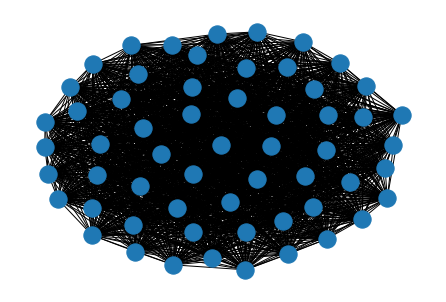

In [8]:
import networkx as nx
import numpy as np


net3 = nx.Graph()
net3 = nx.from_pandas_edgelist(df1515_2, source ="d1_1515", target = "d2_1515", edge_attr = "value1515")

#Remove self loops
net3.remove_edges_from(nx.selfloop_edges(net3))

nx.draw(net3)

In [9]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(120)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
Testing = nt.from_nx(nx_graph)
nt.show('nx.html')

# Pyvis

## Adding a pre-made networkX to processing in pyvis

In [ ]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(120)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
Testing = nt.from_nx(nx_graph)
nt.show('nx.html')

## Pyvis from panda df's
- This approach will require that the df have coordinates for each metabolite in when adding 

In [11]:
from pyvis.network import Network
import pandas as pd

net2 = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
net2.barnes_hut(gravity=-80000, central_gravity=0.3, spring_length=250, spring_strength=0.001, damping=0.09, overlap=0)
data = df1515_2

sources = data["d1_1515"]
targets = data['d2_1515']
weights = data['value1515']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    net2.add_node(src, src, title=src)
    net2.add_node(dst, dst, title=dst)
    net2.add_edge(src, dst, value=w)

neighbor_map = net2.get_adj_list()

# add neighbor data to node hover data
for node in net2.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

net2.toggle_physics(False)
net2.show_buttons(filter_=['physics'])
net2.show('Metabolic_network.html')

# Adding nodes with attributes


### Adding nodes with attributes
- 1. One approach is to create lists from columns from each dataframe and then parse them as values in the script below
   - haha fml pyvis does not support df's, lists or series 🪦🪦🪦🪦🪦🪦

- 2. Create the network in networkX and import it to pyvis via from_nx

   ```python
      import networkx as nx
      import pyvis.network as network

      nx_graph = nx.cycle_graph(10)
      
      network.from_nx(nx_graph)